In [2]:
from context import CL61_module as mCL61

In [3]:
februar = mCL61.CL61Processor(folder_path='../Data', specific_filename='temp_20230204.nc')
june = mCL61.CL61Processor(folder_path='../Data', specific_filename='temp_1d_test.nc')

In [4]:
februar.mask_noise()
june.mask_noise()

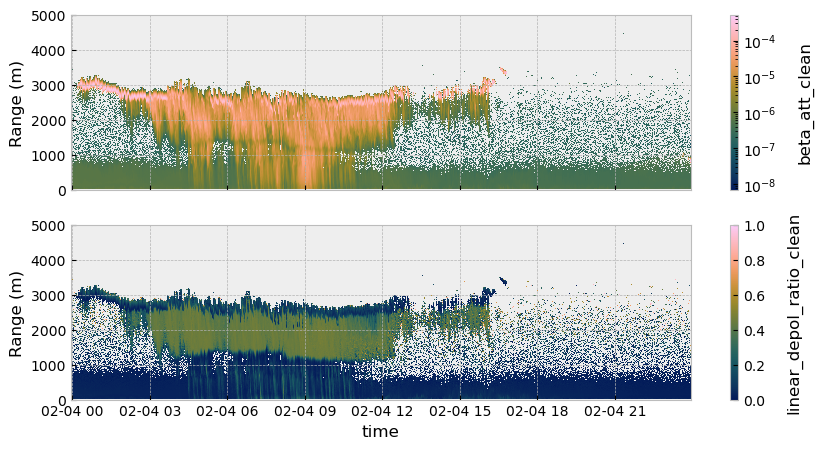

In [5]:
februar.visualize_data(plot_type='colormesh', varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'])

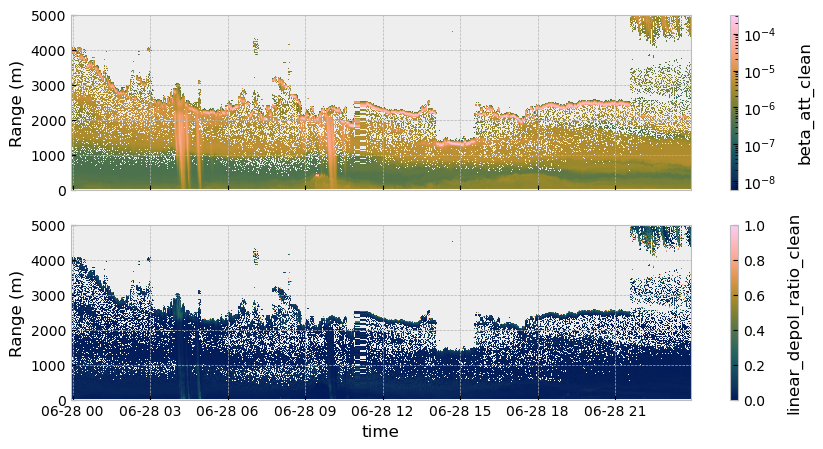

In [6]:
june.visualize_data(plot_type='colormesh', varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'])

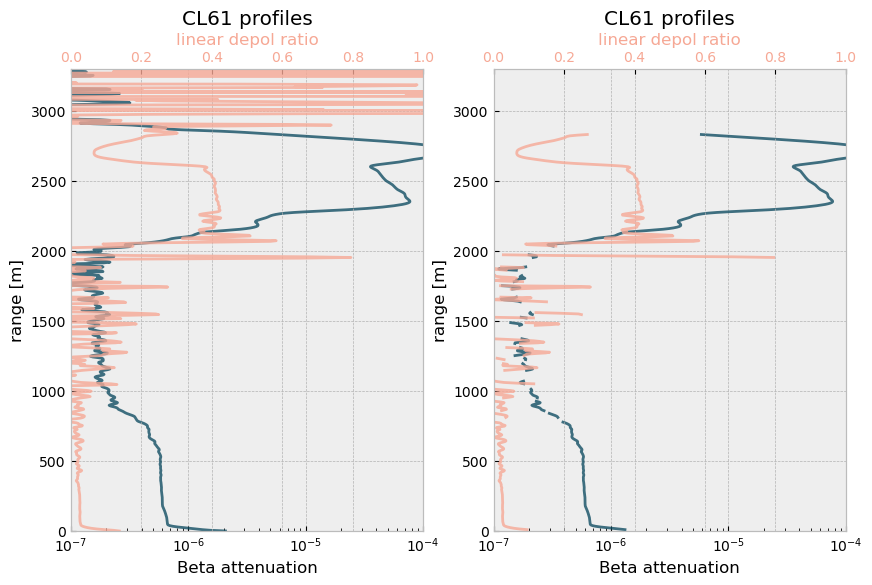

array([<Axes: xlabel='Beta attenuation', ylabel='range [m]'>,
       <Axes: xlabel='Beta attenuation', ylabel='range [m]'>],
      dtype=object)

In [7]:
februar.compare_profiles('02-04-2023 03:00', hlims=[0,3300])

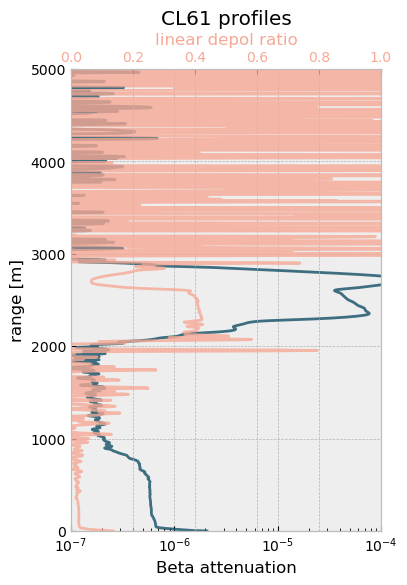

In [11]:
februar.vertical_profiles(time_of_interest='02-04-2023 03:00', hlims=[0,5000])

In [ ]:
june.vertical_profiles()

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.log(februar_cl61.dataset['beta_att_clean'].values.flatten())
y = februar_cl61.dataset['linear_depol_ratio_clean'].values.flatten()

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(9, 4))

hb = ax0.hexbin(x, y, gridsize=50, cmap='inferno')
ax0.set(xlim=[-17, -8], ylim=[0,1])
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax0, label='counts')

hb = ax1.hexbin(x, y, gridsize=50, vmin=1, vmax=5e4,
                bins='log', cmap='inferno')
ax1.set(xlim=[-17, -8], ylim=[0,0.8])
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax1, label='log10(N)')

NameError: name 'februar_cl61' is not defined

## Tests to vizualize as 3D histogram contour layers

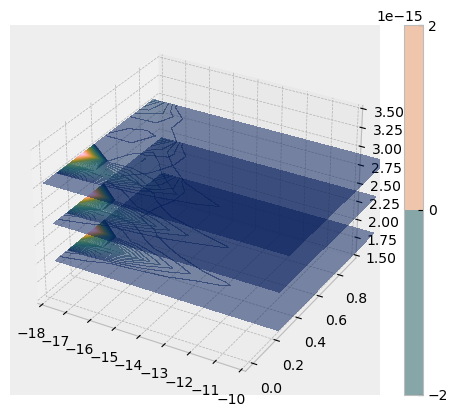

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker
# Your data
x = np.log(februar_cl61.dataset['beta_att_clean'].values.flatten())
y = februar_cl61.dataset['linear_depol_ratio_clean'].values.flatten()
range_array = np.repeat(februar_cl61.dataset['range'], y.size // len(februar_cl61.dataset['range']))
points_all = np.vstack((x, y, range_array)).T
points = points_all[~np.isnan(points_all).any(axis=1), :]

heights = np.logspace(2,4, num=5)
#heights = [500, 1000, 2000, 3000, 6000]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

last_h = 0
for i, h in enumerate(heights):
        
    condition = (points[:, 2] > max((0,heights[i]-500))) & (points[:, 2] < min(heights[i]+500, 1500))
    selected_points = points[condition]

    # Create a 2D histogram of your data
    H, xedges, yedges = np.histogram2d(selected_points[:,0], selected_points[:,1], bins=(10, 10))  # You can adjust the number of bins (e.g., 100x100)

    X, Y = np.meshgrid(xedges[:-1],yedges[:-1])

    # Plot the contour lines
    cs = ax.contourf(X, Y, H, 
                    zdir='z', 
                    offset=np.log10(heights[i]),
                    levels = 100,
                    cmap='cmc.batlow', 
                    alpha=0.5)
    #cs = ax.hexbin(selected_points[:,0], selected_points[:,1]
    #            , gridsize=50, bins='log', cmap='inferno', zdir = 'z', offset = heights[1])

#plt.zscale('log')
ax.set_xlim(-18, -10)
#ax1.set_ylim(-3, 3)
ax.set_zlim(1.5, 3.5)
plt.colorbar(cs)
plt.show()